In [ ]:
!unzip detection_of_lung.zip

Archive:  detection_of_lung.zip
   creating: detection_of_lung/test/
   creating: detection_of_lung/test/healthy/
  inflating: detection_of_lung/test/healthy/0101.jpeg  
  inflating: detection_of_lung/test/healthy/0102.jpeg  
  inflating: detection_of_lung/test/healthy/0103.jpeg  
  inflating: detection_of_lung/test/healthy/0105.jpeg  
  inflating: detection_of_lung/test/healthy/0106.jpeg  
  inflating: detection_of_lung/test/healthy/0107.jpeg  
  inflating: detection_of_lung/test/healthy/0108.jpeg  
  inflating: detection_of_lung/test/healthy/0109.jpeg  
  inflating: detection_of_lung/test/healthy/0110.jpeg  
  inflating: detection_of_lung/test/healthy/0111.jpeg  
  inflating: detection_of_lung/test/healthy/0112.jpeg  
  inflating: detection_of_lung/test/healthy/0114.jpeg  
  inflating: detection_of_lung/test/healthy/0115.jpeg  
  inflating: detection_of_lung/test/healthy/0116.jpeg  
  inflating: detection_of_lung/test/healthy/0117.jpeg  
  inflating: detection_of_lung/test/healthy/01

#Step 1 importing required libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
os.listdir("detection_of_lung")

['train', 'test']

In [ ]:
#Preprocessing --- Goal to make the data compatible for CNN input
train_generator = ImageDataGenerator(rescale=1.0/255)
test_generator = ImageDataGenerator(rescale = 1.0/255)

In [ ]:
#Pass the images through the generator
trainImageData = train_generator.flow_from_directory('detection_of_lung/train',
                                                      batch_size = 7,#how much images to give per iteration in an epoch
                                                     class_mode = 'categorical',# its multiclassification, so we use categorical
                                                     target_size = (48,48)#Ensures all images are of same size (resizing)
                                                     )

testImageData = test_generator.flow_from_directory('detection_of_lung/test',
                                                  batch_size = 7,#how much images to give per iteration in an epoch
                                                     class_mode = 'categorical',# its multiclassification, so we use categorical
                                                     target_size = (48,48) #Ensures all images are of same size (resizing)
                                                  )

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [ ]:
#Given dataset is a balanced dataset !!!
trainImageData.class_indices

{'Healthy': 0, 'Type 1 disease': 1, 'Type 2 disease': 2}

In [ ]:
trainImageData.filenames

['Healthy/01.jpeg',
 'Healthy/010.jpeg',
 'Healthy/011.jpeg',
 'Healthy/012.jpeg',
 'Healthy/013.jpeg',
 'Healthy/014.jpeg',
 'Healthy/015.jpeg',
 'Healthy/016.jpeg',
 'Healthy/017.jpeg',
 'Healthy/018.jpeg',
 'Healthy/019.jpeg',
 'Healthy/02.jpeg',
 'Healthy/020.jpeg',
 'Healthy/021.jpeg',
 'Healthy/022.jpeg',
 'Healthy/023.jpeg',
 'Healthy/024.jpeg',
 'Healthy/025.jpeg',
 'Healthy/03.jpeg',
 'Healthy/04.jpeg',
 'Healthy/05.jpeg',
 'Healthy/050.jpeg',
 'Healthy/051.jpeg',
 'Healthy/052.jpeg',
 'Healthy/053.jpeg',
 'Healthy/054.jpeg',
 'Healthy/055.jpeg',
 'Healthy/056.jpeg',
 'Healthy/057.jpeg',
 'Healthy/058.jpeg',
 'Healthy/059.jpeg',
 'Healthy/06.jpeg',
 'Healthy/060.jpeg',
 'Healthy/061.jpeg',
 'Healthy/062.jpeg',
 'Healthy/063.jpeg',
 'Healthy/064.jpeg',
 'Healthy/065.jpeg',
 'Healthy/066.jpeg',
 'Healthy/067.jpeg',
 'Healthy/068.jpeg',
 'Healthy/069.jpeg',
 'Healthy/07.jpeg',
 'Healthy/070.jpeg',
 'Healthy/071.jpeg',
 'Healthy/072.jpeg',
 'Healthy/073.jpeg',
 'Healthy/074.jpeg',

In [ ]:
trainImageData.image_shape

(48, 48, 3)

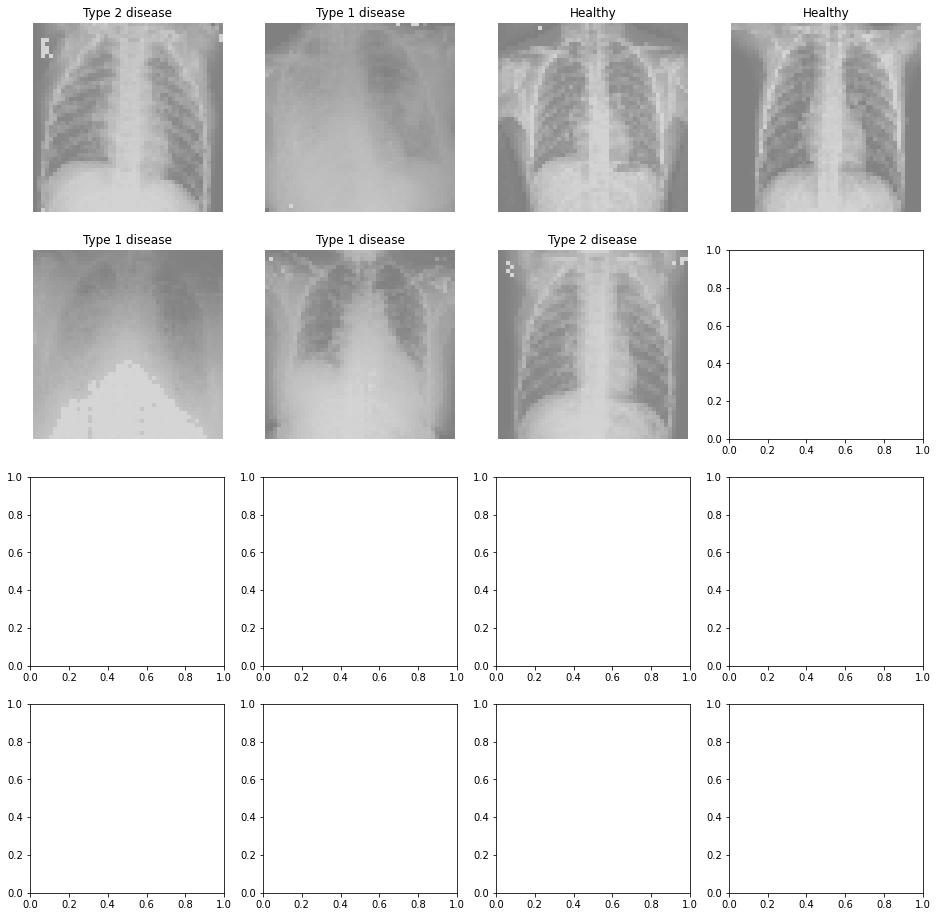

In [ ]:
#Plotting

all_labels = trainImageData.class_indices

def plotImagesAndLabels():
    t_x, t_y = next(trainImageData)
    fig, m_axs = plt.subplots(4, 4, figsize = (16, 16))
    for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
        c_ax.imshow(c_x[:,:,0], cmap = 'gray', vmin = -1.5, vmax = 1.5)
        c_ax.set_title(', '.join([n_class for n_class, n_score in zip(all_labels, c_y)
                                 if n_score>0.5]))
        c_ax.axis('off')
plotImagesAndLabels()

In [ ]:
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

In [ ]:
#Architect the model
model = Sequential()

#first convolution layer
model.add(Conv2D(255, (3,3), input_shape = trainImageData.image_shape, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))


#second convolution layer
model.add(Conv2D(128, (3,3),input_shape = trainImageData.image_shape, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size = (2,2)))

In [ ]:
#flatten
model.add(Flatten())

In [ ]:
#first layer
model.add(Dense(48, activation  = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

#second layer
model.add(Dense(24, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(12, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 255)       7140      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 255)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       293888    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 128)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 48)                8

In [ ]:
from tensorflow.keras.metrics import Precision, Recall
from keras.callbacks import EarlyStopping

In [ ]:
#Compile

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=['accuracy',Precision(),Recall()])

In [ ]:
#early stopping
es = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=2,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False)

In [ ]:
# Fitting the model
batch_size=48
history = model.fit(trainImageData,
          validation_data=testImageData, callbacks=[es],
          epochs=10,
          steps_per_epoch = len(trainImageData.filenames) // trainImageData.batch_size,
          validation_steps= len(testImageData.filenames) // testImageData.batch_size,
                   )

Epoch 1/10
35/35 [==============================] - 13s 362ms/step - loss: 0.4943 - accuracy: 0.7746 - precision: 0.8053 - recall: 0.7459 - val_loss: 3.2609 - val_accuracy: 0.3492 - val_precision: 0.3448 - val_recall: 0.3175
Epoch 2/10
35/35 [==============================] - 12s 342ms/step - loss: 0.3027 - accuracy: 0.8770 - precision: 0.8979 - recall: 0.8648 - val_loss: 6.8496 - val_accuracy: 0.2857 - val_precision: 0.2857 - val_recall: 0.2857
Epoch 3/10
35/35 [==============================] - 12s 344ms/step - loss: 0.3406 - accuracy: 0.8770 - precision: 0.8875 - recall: 0.8730 - val_loss: 6.3202 - val_accuracy: 0.2857 - val_precision: 0.2857 - val_recall: 0.2857


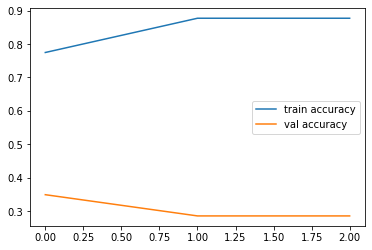

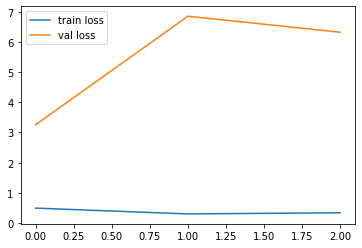

<Figure size 432x288 with 0 Axes>

In [ ]:
# plotting the accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# plotting the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

#Transfer learning using mobilenet

In [ ]:
# import the libraries

from keras.layers import Input, Dense, Flatten
from keras.models import Model
from keras.applications.mobilenet import MobileNet
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob

In [ ]:
training_path = 'detection_of_lung/train/'
testing_path = 'detection_of_lung/test/'

In [ ]:
#Initialize Glob to interact with storage

image_files = glob(training_path +'/*/*.jp*g')
valid_image_files = glob(testing_path +'/*/*.jp*g')

In [ ]:
#Creating ImageGenerator object

gen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input,
                                                      rotation_range=20,
                                                      shear_range=0.1,
                                                      zoom_range=0.2,
                                                      horizontal_flip=True,
                                                      vertical_flip=True)

gen2 = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)

In [ ]:
#Creating Train and Valid Object

train_generator = gen.flow_from_directory(training_path,
                                          target_size=[224,224],
                                          class_mode='categorical',
                                          batch_size=64)

valid_generator = gen2.flow_from_directory(testing_path,
                                          target_size=[224,224],
                                          class_mode='categorical',
                                          batch_size=64)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [ ]:
trainImageData.class_indices


{'Healthy': 0, 'Type 1 disease': 1, 'Type 2 disease': 2}

In [ ]:
#Loading the model


mobilenet = tf.keras.applications.mobilenet.MobileNet(input_shape=[224,224,3],
                                        weights='imagenet',
                                        include_top=False)

for layer in mobilenet.layers:
  layer.trainable=False

17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.models import Model, Sequential

In [ ]:
#flatten
flatten = tf.keras.layers.Flatten()

In [ ]:
#adding layers

x = Dense(256, activation='tanh')
x = Dense(256, activation='relu')
x= BatchNormalization()
x = Dropout(0.3)


# Output Layer


finalLayer = tf.keras.layers.Dense(3,activation="softmax")

In [ ]:
#Creating Final Model

model = tf.keras.models.Sequential([
                                    mobilenet,
                                    flatten,
                                    finalLayer
])

In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 50176)             0         
                                                                 
 dense_6 (Dense)             (None, 3)                 150531    
                                                                 
Total params: 3,379,395
Trainable params: 150,531
Non-trainable params: 3,228,864
_________________________________________________________________


In [ ]:
mobilenet.summary()


Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [ ]:
from tensorflow.keras.metrics import Precision, Recall
from keras.callbacks import EarlyStopping
from keras import callbacks

In [ ]:
#Compile

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=['accuracy',Precision(),Recall()])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=2)


In [ ]:
#Fit Model
batch_size=16
history = model.fit(train_generator, callbacks=[es],
                    validation_data=valid_generator,
                    epochs=10,
                    steps_per_epoch=len(train_generator.filenames) // batch_size,
                    validation_steps=len(valid_generator.filenames) // batch_size,
                   )

Epoch 1/10
 4/15 [=======>......................] - ETA: 32s - loss: 37.9264 - accuracy: 0.4104 - precision_1: 0.4000 - recall_1: 0.3904

15/15 [==============================] - 19s 936ms/step - loss: 37.9264 - accuracy: 0.4104 - precision_1: 0.4000 - recall_1: 0.3904 - val_loss: 50.1165 - val_accuracy: 0.3030 - val_precision_1: 0.3030 - val_recall_1: 0.3030


In [ ]:
evaluation = model.evaluate(valid_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train_generator)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

10/10 [==============================] - 7s 635ms/step - loss: 3279.6523 - accuracy: 0.3030 - precision_2: 0.3030 - recall_2: 0.3030
Test Accuracy: 30.30%
36/36 [==============================] - 27s 750ms/step - loss: 3225.2080 - accuracy: 0.3586 - precision_2: 0.3586 - recall_2: 0.3586
Train Accuracy: 35.86%


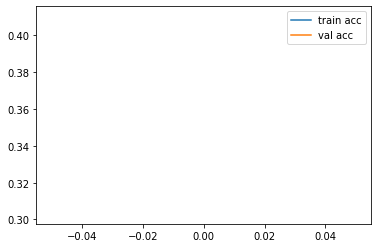

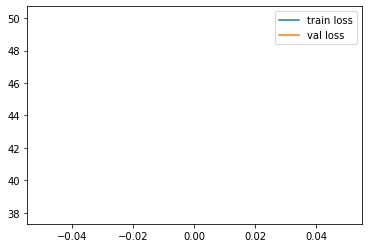

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

#Transfer learning using Densenet121

In [ ]:
import tensorflow as tf
from tensorflow.keras import callbacks
from tensorflow.keras import optimizers
from tensorflow.keras import Model
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Conv2D, Dropout, Flatten, Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from glob import glob

In [ ]:
training_path = 'detection_of_lung/train/'
testing_path = 'detection_of_lung/test/'

In [ ]:
#Initialize Glob to interact with storage

image_files = glob(training_path +'/*/*.jp*g')
valid_image_files = glob(testing_path +'/*/*.jp*g')

In [ ]:
#Step1: Create ImageGenerator object (Use Algo's preprocessing function)

gen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input,
                                                      rotation_range=25,
                                                      shear_range=0.1,
                                                      zoom_range=0.2,
                                                      horizontal_flip=True,
                                                      vertical_flip=True)

gen2 = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input)

In [ ]:
#Step2: Create Train and Valid Obj

train_generator = gen.flow_from_directory(training_path,
                                          target_size=[224,224],
                                          class_mode='categorical',
                                          batch_size=7)

valid_generator = gen2.flow_from_directory(testing_path,
                                          target_size=[224,224],
                                          class_mode='categorical',
                                          batch_size=7)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [ ]:
#Step3: Load the model with Training Enabled ! --->
# removing top layer


densenet = tf.keras.applications.densenet.DenseNet121(input_shape=[224,224,3],
                                        weights=None,
                                        include_top=False)

In [ ]:
#Flatten

flatten = tf.keras.layers.Flatten()


x = Dense(256, activation='relu')
x = Dense(128, activation='relu')
x= BatchNormalization()
x = Dropout(0.3)

# Output Layer


finalLayer = tf.keras.layers.Dense(3,activation="softmax")

In [ ]:
#Creating Final Model

model = tf.keras.models.Sequential([
                                    densenet,
                                    flatten,
                                    finalLayer
])

In [ ]:
densenet.summary()


Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_2[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                        

In [ ]:
#Compile

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy', Precision(),Recall()])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=2)


In [ ]:
batch_size=16
history = model.fit(train_generator, callbacks=[es],
                    validation_data=valid_generator,
                    epochs=15,
                    steps_per_epoch=len(train_generator.filenames) // batch_size,
                    validation_steps=len(valid_generator.filenames) // batch_size,
                   )

Epoch 1/15
15/15 [==============================] - 61s 3s/step - loss: 6.6434 - accuracy: 0.5962 - precision_2: 0.5922 - recall_2: 0.5865 - val_loss: 230.0247 - val_accuracy: 0.1429 - val_precision_2: 0.1429 - val_recall_2: 0.1429
Epoch 2/15
15/15 [==============================] - 49s 3s/step - loss: 3.2612 - accuracy: 0.6250 - precision_2: 0.6250 - recall_2: 0.6250 - val_loss: 997.1913 - val_accuracy: 0.2500 - val_precision_2: 0.2500 - val_recall_2: 0.2500
Epoch 3/15
15/15 [==============================] - 48s 3s/step - loss: 4.2853 - accuracy: 0.6731 - precision_2: 0.6796 - recall_2: 0.6731 - val_loss: 2792.2014 - val_accuracy: 0.3214 - val_precision_2: 0.3214 - val_recall_2: 0.3214


KeyError: ignored

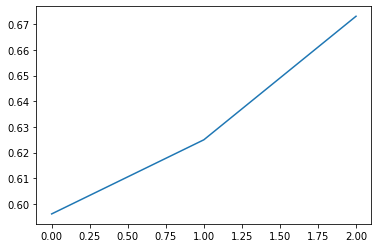

In [ ]:
# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['valid_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

while comparing three model in all CNN architecture is the best model to predict outcome